In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel("/content/consolidated_resumes (7).xlsx")
df.head()

,Filename,Extracted Text,Category
0,React Developer_Vinay Reddy.doc,Maryala Vinay Reddy\n\nProfessional Summary:\t...,React Developer
1,React Developer_Sarala Madasu-converted.docx,"204,Sri geethika prestige,road number 10,ban...",React Developer
2,Reactjs Developer_MD Khizaruddin Rauf _Musquar...,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React Developer
3,React JS Developer_Venkatalakshmi (1)-converte...,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React Developer
4,React Developer_Thirupathiamma.docx,Thirupathamma Balla\n\nSUMMARY:\n\n2.8 year of...,React Developer


In [ ]:
df.describe()

,Filename,Extracted Text,Category
count,79,79,79
unique,79,79,4
top,React Developer_Vinay Reddy.doc,Maryala Vinay Reddy\n\nProfessional Summary:\t...,React Developer
freq,1,1,24


In [ ]:
df.dtypes

,0
Filename,object
Extracted Text,object
Category,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Filename        79 non-null     object
 1   Extracted Text  79 non-null     object
 2   Category        79 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
len(df)

79

In [ ]:
df['Category'].value_counts()

,count
Category,
React Developer,24
workday,21
Peoplesoft Resume,20
SQL Developer,14


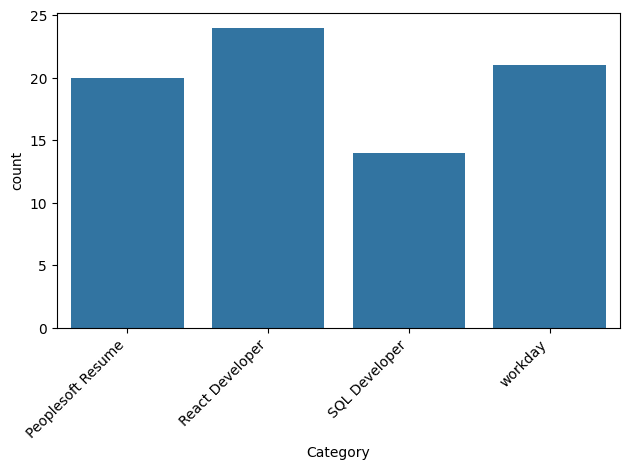

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Category' column to category type if it is not already
df['Category'] = df['Category'].astype('category')

# Plot the counts of each category using seaborn
sns.countplot(x='Category', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
df['length']=df['Extracted Text'].apply(len)
df.drop(columns=['Filename'],inplace=True)
df.head()

,Extracted Text,Category,length
0,Maryala Vinay Reddy\n\nProfessional Summary:\t...,React Developer,3320
1,"204,Sri geethika prestige,road number 10,ban...",React Developer,2540
2,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React Developer,3171
3,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React Developer,2120
4,Thirupathamma Balla\n\nSUMMARY:\n\n2.8 year of...,React Developer,992


<ipython-input-7-322845fc7aa2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.hist(column='length',by='Category')


array([[<Axes: title={'center': 'Peoplesoft Resume'}>,
        <Axes: title={'center': 'React Developer'}>],
       [<Axes: title={'center': 'SQL Developer'}>,
        <Axes: title={'center': 'workday'}>]], dtype=object)

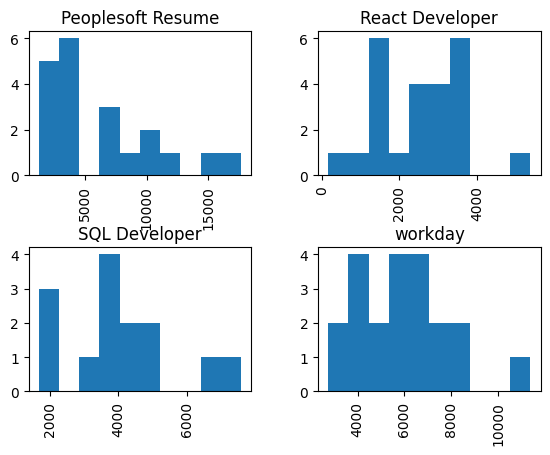

In [ ]:
df.hist(column='length',by='Category')

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required nltk data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize Lemmatizer
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Apply text processing directly using lambda function
df['Cleaned Text'] = df['Extracted Text'].apply(lambda x:
    ' '.join([
        lemma.lemmatize(word) for word in re.sub('[^a-zA-Z]', ' ', ' '.join(x) if isinstance(x, list) else x)
        .lower()
        .split() if word not in stop_words
    ])
)

# Calculate cleaned text length
df['cleaned_length'] = df['Cleaned Text'].apply(len)

# Display first few rows
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Extracted Text,Category,length,Cleaned Text,cleaned_length
0,Maryala Vinay Reddy\n\nProfessional Summary:\t...,React Developer,3320,maryala vinay reddy professional summary year ...,2237
1,"204,Sri geethika prestige,road number 10,ban...",React Developer,2540,sri geethika prestige road number bandari layo...,1970
2,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React Developer,3171,md khizaruddin rauf experience currently worki...,2180
3,Venkatalakshmi Pedireddy\nSoftware Developer\n...,React Developer,2120,venkatalakshmi pedireddy software developer ex...,1561
4,Thirupathamma Balla\n\nSUMMARY:\n\n2.8 year of...,React Developer,992,thirupathamma balla summary year experience re...,794


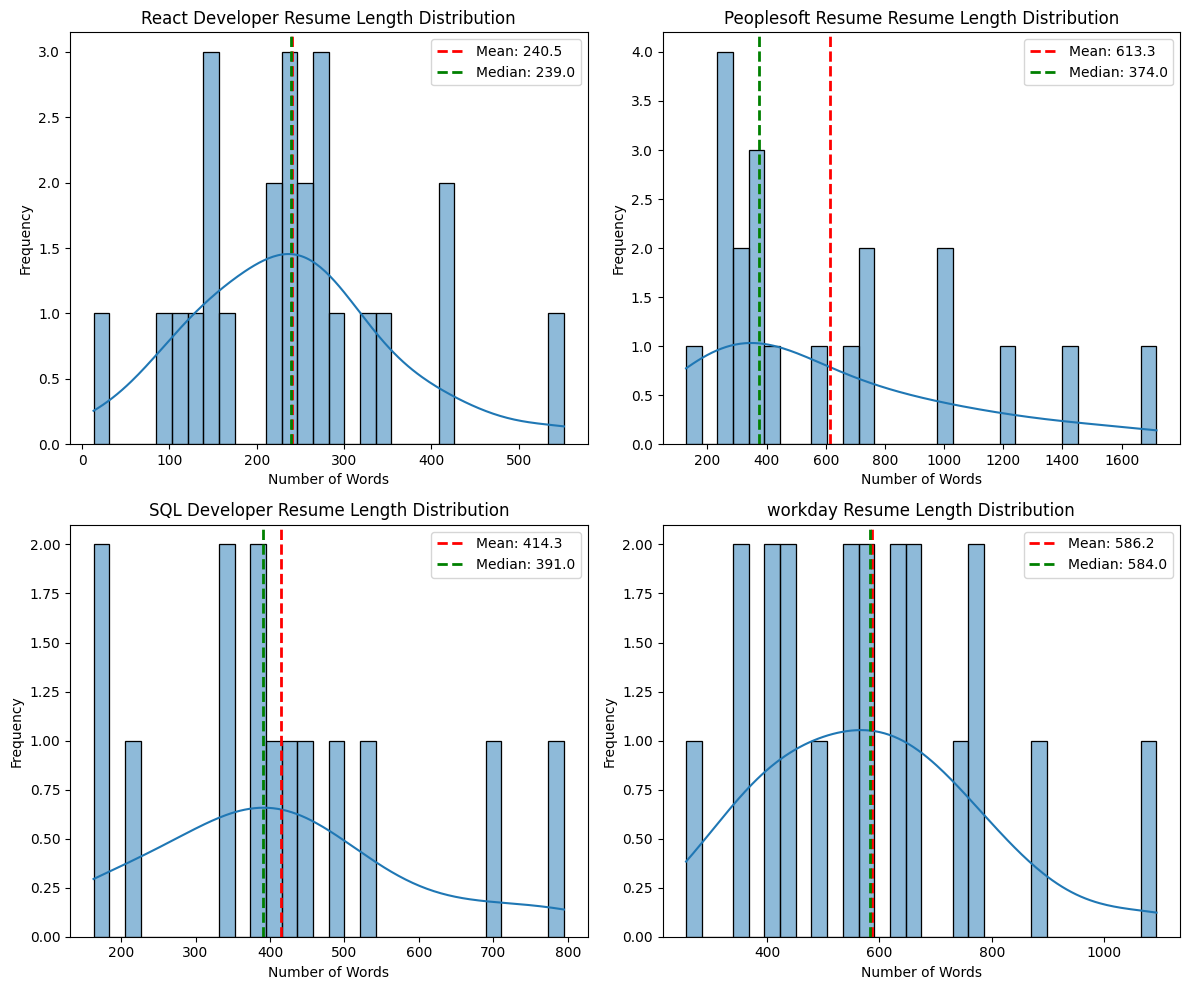

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate word counts for each resume
df['word_count'] = df['Cleaned Text'].apply(lambda x: len(x.split()))

# Get unique categories
categories = df['Category'].unique()

# Create subplots (2x2 layout for 4 categories)
plt.figure(figsize=(12, 10))

for i, category in enumerate(categories, 1):
    category_df = df[df['Category'] == category]  # Filter data by category

    # Calculate mean and median
    mean_length = np.mean(category_df['word_count'])
    median_length = np.median(category_df['word_count'])

    plt.subplot(2, 2, i)  # 2x2 layout
    sns.histplot(category_df['word_count'], bins=30, kde=True, edgecolor='black')

    # Add mean and median lines
    plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.1f}')
    plt.axvline(median_length, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_length:.1f}')

    # Labels and title
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.title(f"{category} Resume Length Distribution")
    plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
!pip install wordcloud

In [ ]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def wordcloud(data,title):
  txt=' '.join(data['Cleaned Text'])
  txt=txt.lower()
  stop=STOPWORDS
  wc=WordCloud(background_color='White',stopwords=stop).generate(txt)
  plt.imshow(wc)
  plt.axis('off')
  plt.title(title)

In [ ]:
df['Category'] = df['Category'].replace({
    'Peoplesoft Resume': 'Peoplesoft_Resume',
    'SQL Developer': 'SQL_Developer',
    'React Developer': 'React_Developer'
})

<ipython-input-13-973e0cc3499a>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Category'] = df['Category'].replace({


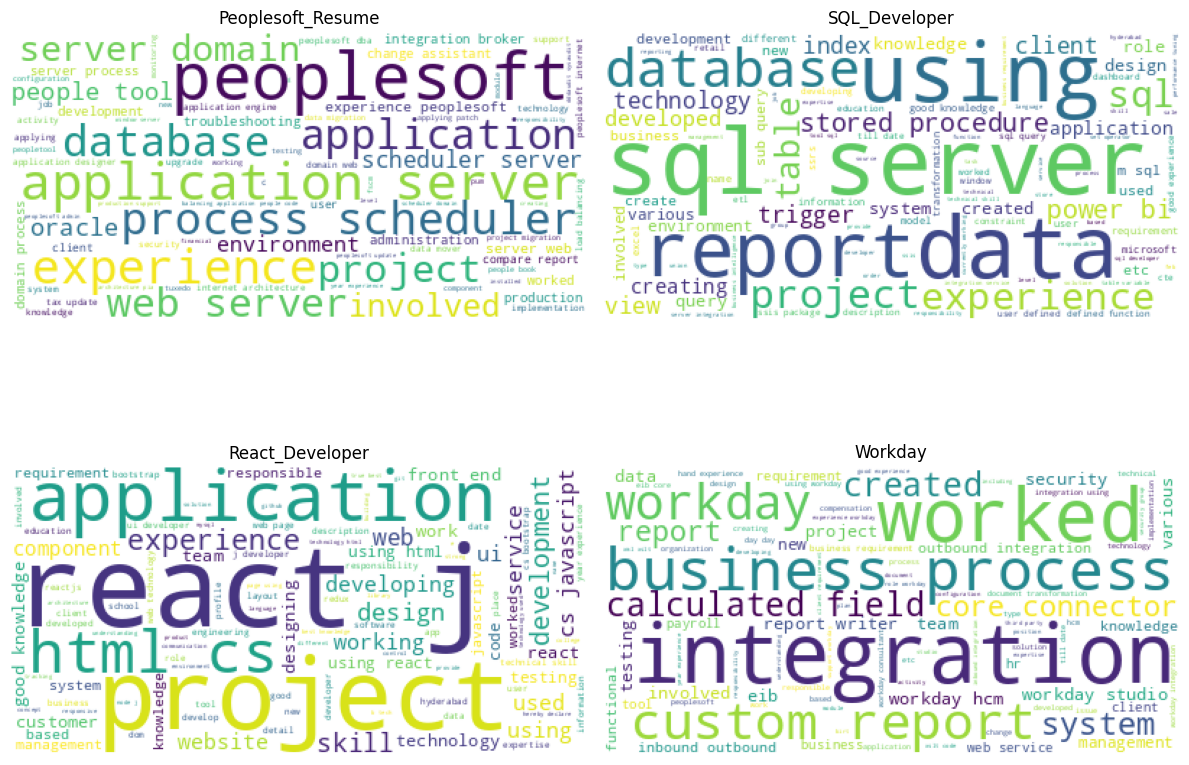

In [ ]:
# Filter the dataframe to get only the Peoplesoft resumes
Peoplesoft_Resume = df[df['Category'] == 'Peoplesoft_Resume']
SQL_Developer = df[df['Category'] == 'SQL_Developer']
React_Developer = df[df['Category'] == 'React_Developer']
workday=df[df['Category']=='workday']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplot(2, 2, 1)
wordcloud(Peoplesoft_Resume, 'Peoplesoft_Resume')

plt.subplot(2, 2, 2)
wordcloud(SQL_Developer, 'SQL_Developer')

plt.subplot(2, 2, 3)
wordcloud(React_Developer, 'React_Developer')

plt.subplot(2, 2, 4)
wordcloud(workday, 'Workday')

plt.tight_layout()  # Adjust layout
plt.show()


<ipython-input-15-b8c660fafef8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words), x=list(counts), palette="viridis")  # Bar chart
<ipython-input-15-b8c660fafef8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words), x=list(counts), palette="viridis")  # Bar chart
<ipython-input-15-b8c660fafef8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words), x=list(counts), palette="viridis")  # Bar chart
<ipython-input-15-b8c660fafef8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

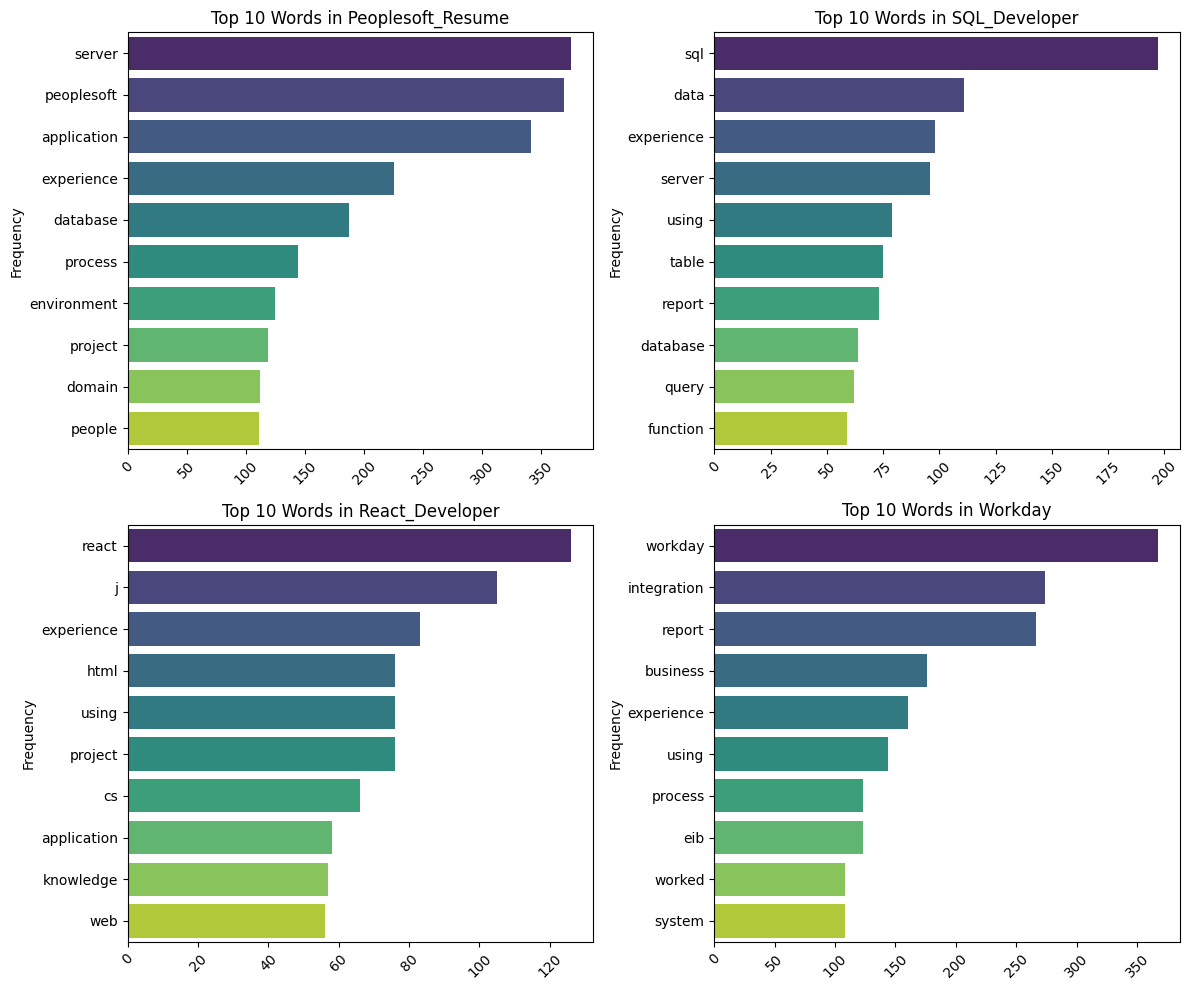

In [ ]:
from collections import Counter

# Function to get top 'n' words and their frequencies
def top_words(data, n=10):
    text = ' '.join(data['Cleaned Text'])  # Combine all text
    words = text.split()  # Tokenize
    return Counter(words).most_common(n)  # Get most common words

# Function to plot bar chart
def plot_top_words(category_name, data, position):
    ntop_words = top_words(data)  # Get top words
    words, counts = zip(*ntop_words)  # Unpack words and counts

    plt.subplot(2, 2, position)  # 2x2 subplot
    sns.barplot(y=list(words), x=list(counts), palette="viridis")  # Bar chart
    plt.title(f"Top 10 Words in {category_name}")  # Title
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.ylabel("Frequency")  # Y-axis label

# Create a 2x2 figure
plt.figure(figsize=(12, 10))

plot_top_words("Peoplesoft_Resume", Peoplesoft_Resume, 1)
plot_top_words("SQL_Developer", SQL_Developer, 2)
plot_top_words("React_Developer", React_Developer, 3)
plot_top_words("Workday", workday, 4)

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot


#Model building-Feature Extraction

1.Naive_Bayes

In [ ]:
!pip install --upgrade scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Correct the import statement

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(df['Cleaned Text']).toarray()
x=pd.DataFrame(x,columns=cv.get_feature_names_out())
x.head()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
oe=OrdinalEncoder()
y=oe.fit_transform(df[['Category']])
y

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# List to store results
results = []

# Modify function to return metrics
def prediction1(model, model_name):
    model.fit(xtrain, ytrain.ravel())
    ypred = model.predict(xtest)

    train_acc = accuracy_score(ytrain, model.predict(xtrain))
    test_acc = accuracy_score(ytest, ypred)
    precision = precision_score(ytest, ypred, average='weighted')
    recall = recall_score(ytest, ypred, average='weighted')
    f1 = f1_score(ytest, ypred, average='weighted')

    # Append results
    results.append([model_name, train_acc, test_acc, precision, recall, f1])

    # Print the classification report
    print(f"Classification Report for {model_name}:\n", classification_report(ytest, ypred))

    # Confusion Matrix
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



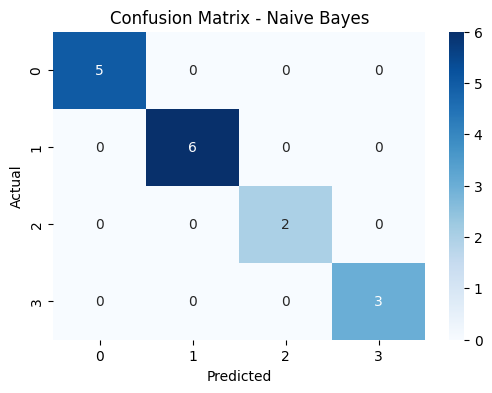

In [78]:
prediction1(MultinomialNB(), "Naive Bayes")

2.Support Vector Machine(SVM)

In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'C':[0.1,0.001,0.5,0.9,1,2,3],'kernel':['linear','poly','rbf'],'gamma':[0.1,0.001,0.5,0.9,1,2,3]}
grid=GridSearchCV(SVC(),param_grid=params,cv=5,scoring='accuracy')
grid.fit(xtrain,ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 0.5, 0.9, 1, 2, 3],
                         'gamma': [0.1, 0.001, 0.5, 0.9, 1, 2, 3],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

Classification Report for SVM Classifier:
               precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.83      0.83      0.83         6
         2.0       0.67      1.00      0.80         2
         3.0       1.00      1.00      1.00         3

    accuracy                           0.88        16
   macro avg       0.88      0.91      0.88        16
weighted avg       0.90      0.88      0.88        16



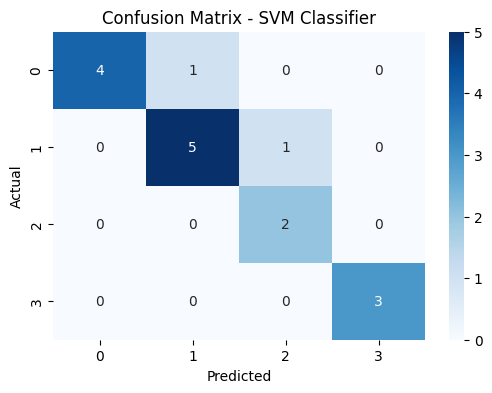

In [80]:
prediction1(SVC(C=0.1, gamma=0.1, kernel='linear'), "SVM Classifier")

3.Ensemble Methods

Classification Report for Bagged Decision Tree:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



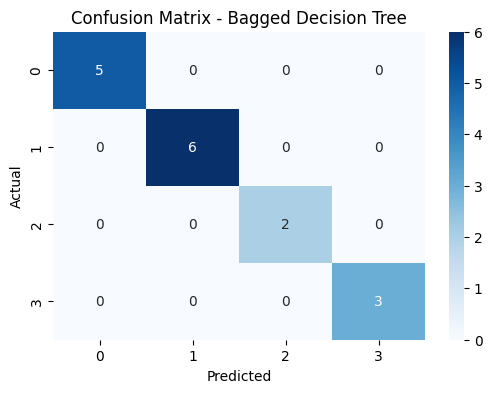

In [81]:
#Bagged Decision Trees
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed=7
kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
cart=DecisionTreeClassifier()
num_trees=100
prediction1(BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=7), "Bagged Decision Tree")

In [41]:
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification


# Define hyperparameter grid (Fixed `base_estimator` issue)
param_grid = {
    'n_estimators': [50, 100],  # Number of trees
    'estimator__max_depth': [3, 5, 10],  # Limit tree depth
    'estimator__min_samples_split': [5, 10, 20],  # Minimum samples for a split
    'estimator__min_samples_leaf': [2, 5, 10],  # Minimum samples per leaf
    'max_features': [0.3, 0.5, 0.7],  # Feature subset per tree
    'max_samples': [0.7, 0.8, 0.9]  # Subsample of data for each tree
}

# Initialize KFold for cross-validation
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

# Define Base Decision Tree with pruning (to avoid overfitting)
cart = DecisionTreeClassifier(ccp_alpha=0.01, random_state=seed)

# Define Bagging Classifier
model = BaggingClassifier(estimator=cart, random_state=seed, oob_score=True)

# Perform Grid Search with Corrected Parameter Names
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(xtrain, ytrain.ravel())  # Ensure y is 1D

# Display best parameters and best score
print("Best parameters:", grid_search.best_params_)



Fitting 10 folds for each of 486 candidates, totalling 4860 fits
Best parameters: {'estimator__max_depth': 3, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'max_features': 0.3, 'max_samples': 0.7, 'n_estimators': 100}


Classification Report for Tuned Bagged Decision Tree:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



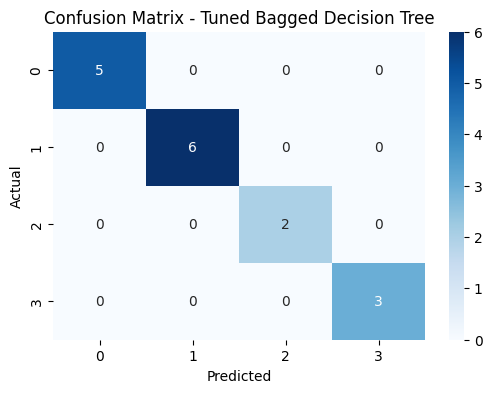

In [64]:
prediction1(BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2), n_estimators=100, random_state=7), "Tuned Bagged Decision Tree")

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.86      1.00      0.92         6
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.96      0.95      0.95        16
weighted avg       0.95      0.94      0.94        16



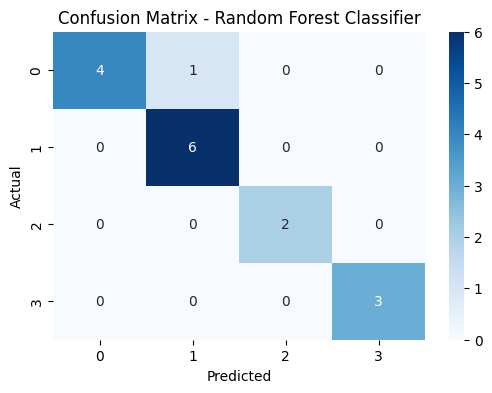

Top 8 features:
1. feature Feature 3051 (0.010975)
2. feature Feature 1565 (0.010504)
3. feature Feature 3306 (0.007545)
4. feature Feature 442 (0.007306)
5. feature Feature 3606 (0.007152)
6. feature Feature 1639 (0.006685)
7. feature Feature 2487 (0.006469)
8. feature Feature 434 (0.006383)


In [82]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
num_trees=100
max_features=8
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
prediction1(model, "Random Forest Classifier")

# Get feature importances and corresponding feature names
importances = model.feature_importances_
#feature_names = xtrain.columns #xtrain is a numpy array, it does not have the attribute 'columns'

# Assuming 'x' was your original DataFrame with feature names
#feature_names = x.columns  # Access columns from the original DataFrame 'x'
#Since your x is an array and it does not have column names, we will just get the index of the features.
feature_names = [f"Feature {i}" for i in range(x.shape[1])] # Create feature names based on index


# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the top 'max_features' features
print("Top", max_features, "features:")
for f in range(max_features):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Classification Report for AdaBoost Classifier:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       0.00      0.00      0.00         6
         2.0       0.20      1.00      0.33         2
         3.0       0.00      0.00      0.00         3

    accuracy                           0.44        16
   macro avg       0.26      0.50      0.31        16
weighted avg       0.29      0.44      0.33        16



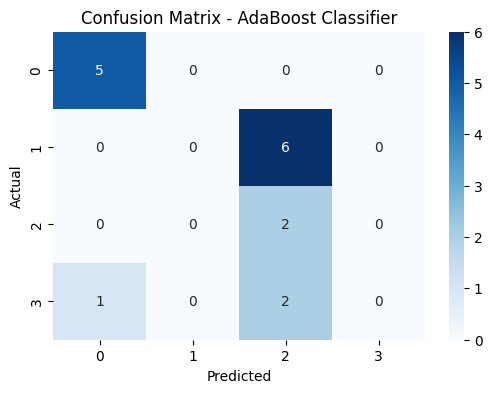

In [83]:
#Adaboost Classification
from sklearn.ensemble import AdaBoostClassifier
prediction1(AdaBoostClassifier(n_estimators=num_trees, random_state=seed), "AdaBoost Classifier")

Classification Report for Stacking Classifier:
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      1.00      1.00         6
         2.0       1.00      0.50      0.67         2
         3.0       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.96      0.88      0.89        16
weighted avg       0.95      0.94      0.93        16



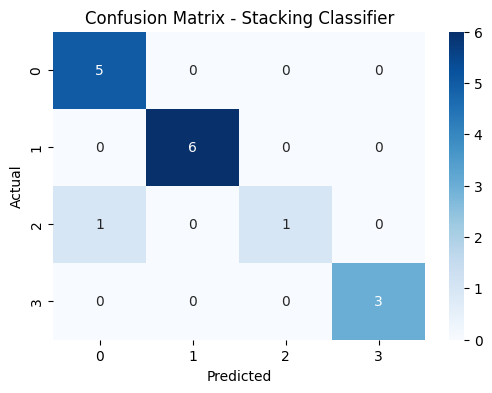

In [84]:
#Stacking
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

stacking_model = StackingClassifier(estimators=[
    ('logistic', LogisticRegression(random_state=7)),
    ('chart', DecisionTreeClassifier(random_state=7)),
    ('svm', SVC(random_state=7))
], final_estimator=VotingClassifier(estimators))

prediction1(stacking_model, "Stacking Classifier")

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

params={'n_estimators':[50,90,100,110,150,200,250],'learning_rate':[0.001,0.01,0.1,0.2,0.3,0.4,0.5],'max_depth':[3,5,7,11]}
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=params,cv=5,scoring='accuracy')
grid.fit(xtrain, ytrain)
grid.best_params_

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Classification Report for Gradient Boosting Classifier:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      0.67      0.80         6
         2.0       1.00      1.00      1.00         2
         3.0       0.60      1.00      0.75         3

    accuracy                           0.88        16
   macro avg       0.90      0.92      0.89        16
weighted avg       0.93      0.88      0.88        16



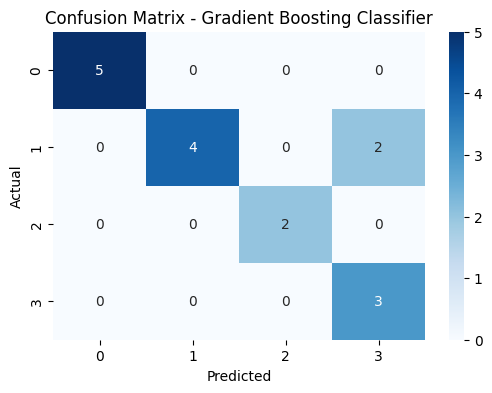

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
prediction1(GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=3), "Gradient Boosting Classifier")

In [56]:
#XGBM
!pip install xgboost
from xgboost import XGBClassifier



In [ ]:
params={'n_estimators':[50,70,90,110,150],'learning_rate':[0.01,0.1,0.5,0.7,1],'lambda':[1,2,3],'max_depth':[3,7,11]}
grid=GridSearchCV(XGBClassifier(),param_grid=params,cv=5,scoring='accuracy')
grid.fit(xtrain, ytrain)
grid.best_params_

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:19:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBM Classifier:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       0.86      1.00      0.92         6
         2.0       1.00      1.00      1.00         2
         3.0       1.00      0.67      0.80         3

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16



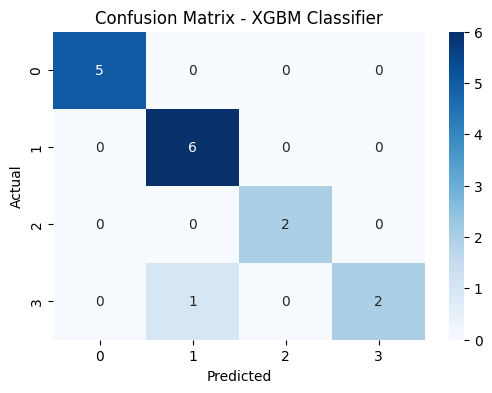

In [86]:
prediction1(XGBClassifier(n_estimators=70, learning_rate=0.1, max_depth=3, reg_lambda=1, random_state=7, use_label_encoder=False, eval_metric='logloss'), "XGBM Classifier")

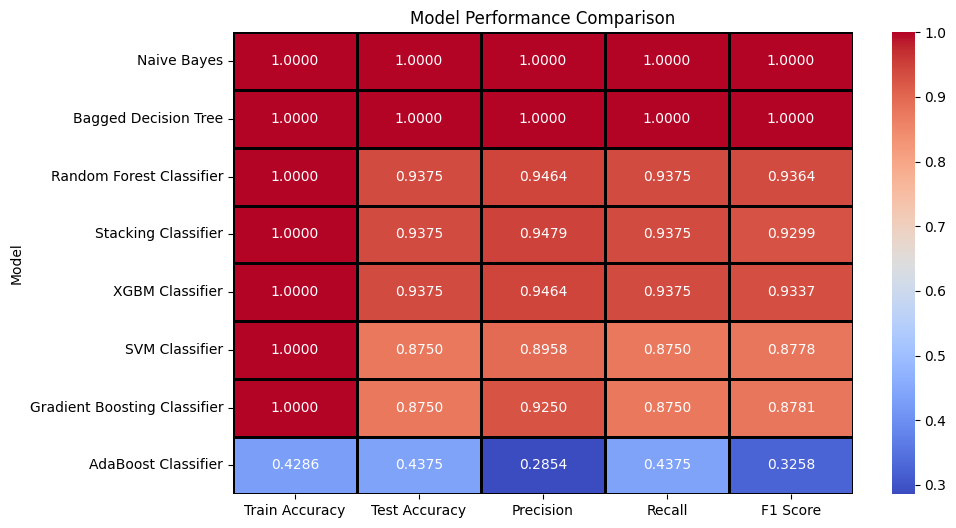

In [89]:

# Convert results into a DataFrame
df_results = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1 Score"])

# Remove duplicate model names if needed
df_results = df_results.drop_duplicates()

# Sort by F1 Score in descending order for better visualization
df_results = df_results.sort_values(by=["Test Accuracy"], ascending=False)

# Set index for better readability
df_results.set_index("Model", inplace=True)

styled_df = df_results.style.set_table_styles(
    [
        {'selector': 'th', 'props': [('background-color', 'lightblue'), ('border', '1px solid black')]},
        {'selector': 'td', 'props': [('border', '1px solid black'), ('text-align', 'center')]}
    ]
).set_properties(**{'background-color': '#f5f5f5', 'color': 'black'})

# Display styled DataFrame
styled_df

# **Save to CSV**
df_results.to_csv("model_evaluation.csv", index=True)

# **Plot Heatmap**
plt.figure(figsize=(10, 6))
sns.heatmap(df_results, annot=True, fmt=".4f", cmap="coolwarm", linewidths=1, linecolor="black")
plt.title("Model Performance Comparison")
plt.show()